<a href="https://colab.research.google.com/github/Himagination/PyTorch/blob/main/First_Hands_On_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Tensor as Numpy n-dimensional array.

In [2]:
import numpy as np

v0 = np.array(1.3)
v1 = np.array([1., 2., 3,])
v2 = np.array([[1., 2., 3.], 
               4., 5., 6.])
print(f"{v0}, {v1}, {v2}")

1.3, [1. 2. 3.], [list([1.0, 2.0, 3.0]) 4.0 5.0 6.0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


## Create a Tensor from Numpy

In [3]:
numpy_array = np.array([1, 2, 3])

### Notes on torch.Tensor
-  torch.Tensor is a main class of Tensor. All other tensors are instance of Tensor class and inherit from this main class.
-  Constructor - is same as torch.FloatTensor hence by default it produces tensor of type float32. This can be a disadvantage as float32 takes more size of bit.

In [4]:
import torch
t1 = torch.Tensor(numpy_array)
t1

tensor([1., 2., 3.])

### Notes on torch.tensor
-  It is a Factory function.
-  It produces tensor of same data type as input.
-  It does not share underlying memory with numpy i.e t2 and numpy_array in above case will have two different memory allocation.
-  It always copies the data i.e modifying the value of t2 won't affect the value of numpy_array.
-  Syntax: torch.tensor(data, *, dtype=None, device=None, requires_grad=False, pin_memory=False)
- Recommended to use.

In [5]:
t2 = torch.tensor(numpy_array)
t2

tensor([1, 2, 3])

### Notes on torch.as_tensor()
-  Factory Function
-  Produces tensor of same data type.
-  Shares the underlying memory with numpy.
-  Can accept any array like Python Data Structure i.e not limited to Numpy.
-  Syntax: torch.as_tensor(data, dtype=None, device=None)
-  We have to manually call requires_grad() function on the final tensor. Does not support as argument by default.
-  Recommended to use.
-  numpy.array objects are allocated on CPU, as_tensor() function must copy the data from CPU to GPU when a GPU is being used.
-  The memory sharing of as_tensor() doesn't work with built-in Python Data Structure like list.
-  The as_tensor() performance improvement will be greater when there are a lot of back and forthoperations between numpy.array objects and tensor objects. 

In [6]:
t3 = torch.as_tensor(numpy_array)
t3

tensor([1, 2, 3])

### Notes on torch.from_numpy()
-  Factory function
-  Produces a new tensor with the same data type
-  Share the underlying memory with numpy.
-  CAN ACCEPT ONLY NUMPY ARRAYS.
-  Syntax: torch.from_numpy(ndarray)

In [7]:
t4 = torch.from_numpy(numpy_array)
t4

tensor([1, 2, 3])

### Changing values

In [8]:
numpy_array *= 4
numpy_array

array([ 4,  8, 12])

In [9]:
t1, t2, t3, t4

(tensor([1., 2., 3.]),
 tensor([1, 2, 3]),
 tensor([ 4,  8, 12]),
 tensor([ 4,  8, 12]))

In [10]:
t1 *= 2
numpy_array, t1, t2, t3, t4

(array([ 4,  8, 12]),
 tensor([2., 4., 6.]),
 tensor([1, 2, 3]),
 tensor([ 4,  8, 12]),
 tensor([ 4,  8, 12]))

In [11]:
t2 *= 2
numpy_array, t1, t2, t3, t4

(array([ 4,  8, 12]),
 tensor([2., 4., 6.]),
 tensor([2, 4, 6]),
 tensor([ 4,  8, 12]),
 tensor([ 4,  8, 12]))

In [12]:
t3 *= 2
numpy_array, t1, t2, t3, t4

(array([ 8, 16, 24]),
 tensor([2., 4., 6.]),
 tensor([2, 4, 6]),
 tensor([ 8, 16, 24]),
 tensor([ 8, 16, 24]))

In [13]:
t4 *= 2
numpy_array, t1, t2, t3, t4

(array([16, 32, 48]),
 tensor([2., 4., 6.]),
 tensor([2, 4, 6]),
 tensor([16, 32, 48]),
 tensor([16, 32, 48]))

In [14]:
t5 = t4.cuda()
t5.device, t4.device

(device(type='cuda', index=0), device(type='cpu'))

In [15]:
t6 = t5 + t4
t6

RuntimeError: ignored

# Autograd
- Automatic differentiation for all operations on Tensors
- The backward graph is automatically defined by the forward graph.

In [16]:
x1 = torch.tensor(2, requires_grad=True, dtype=torch.float16)
x2 = torch.tensor(3, requires_grad=True, dtype=torch.float16)
x3 = torch.tensor(4, requires_grad=True, dtype=torch.float16)
x4 = torch.tensor(5, requires_grad=True, dtype=torch.float16)

x1, x2, x3, x4

(tensor(2., dtype=torch.float16, requires_grad=True),
 tensor(3., dtype=torch.float16, requires_grad=True),
 tensor(4., dtype=torch.float16, requires_grad=True),
 tensor(5., dtype=torch.float16, requires_grad=True))

In [17]:
from torch.autograd import grad

z1 = x1 * x2
z2 = x3 * x4
f = z1 + z2
# f = x1 * x2 + x3 * x4

df_dx = grad(outputs=f, inputs=[x1, x2, x3, x4])
print(f'gradient of x1 = {df_dx[0]}')
print(f'gradient of x2 = {df_dx[1]}')
print(f'gradient of x3 = {df_dx[2]}')
print(f'gradient of x4 = {df_dx[3]}')

gradient of x1 = 3.0
gradient of x2 = 2.0
gradient of x3 = 5.0
gradient of x4 = 4.0


In [18]:
y1 = torch.tensor(2, requires_grad=True, dtype=torch.float16)
y2 = torch.tensor(3, requires_grad=True, dtype=torch.float16)
y3 = torch.tensor(4, requires_grad=True, dtype=torch.float16)
y4 = torch.tensor(5, requires_grad=True, dtype=torch.float16)

z1 = y1 * y2
z2 = y3 * y4
f = z1 + z2
f.backward()
print(f'gradient of x1 = {y1.grad}')
print(f'gradient of x2 = {y2.grad}')
print(f'gradient of x3 = {y3.grad}')
print(f'gradient of x4 = {y4.grad}')

gradient of x1 = 3.0
gradient of x2 = 2.0
gradient of x3 = 5.0
gradient of x4 = 4.0


# Squeezing the Tensor
- Squeeze: Removes all the dimensions that have length of 1
- Unsqueeze: Adds a dimension that has a length of 1

**Why is it required?**

*Neural Networks are always trained in a batch of samples. This is troubling because when we want to test 1 image, we do not have an array, we only have 1 image. Then we unsqueeze to fake a batch.*


In [19]:
# Checking shape, size, number of elements for Tensor
t = torch.tensor([
                  [0, 0, 0, 0], 
                  [1, 2, 3, 4], 
                  [2, 2, 2, 2]
], dtype=torch.float32)
t.shape, t.size(), t.numel()

(torch.Size([3, 4]), torch.Size([3, 4]), 12)

In [20]:
print(t.reshape(1, 12))
print(t.reshape(1, 12).shape)

tensor([[0., 0., 0., 0., 1., 2., 3., 4., 2., 2., 2., 2.]])
torch.Size([1, 12])


In [21]:
print(t.reshape(1, 12).squeeze())
print(t.reshape(1, 12).squeeze().shape)

tensor([0., 0., 0., 0., 1., 2., 3., 4., 2., 2., 2., 2.])
torch.Size([12])


In [22]:
print(t.reshape(1, 12).squeeze().unsqueeze(0))
print(t.reshape(1, 12).squeeze().unsqueeze(0).shape)

tensor([[0., 0., 0., 0., 1., 2., 3., 4., 2., 2., 2., 2.]])
torch.Size([1, 12])


## Flattening the Tensor.
It creates a new Tensor that is only 1D. It is done to connect our data to next Fully Connected Layers

In [23]:
def flatten(t):
  t = t.reshape(1, -1)
  t = t.squeeze()
  return t

In [24]:
t.shape

torch.Size([3, 4])

In [25]:
flatten(t)

tensor([0., 0., 0., 0., 1., 2., 3., 4., 2., 2., 2., 2.])

## Concatenation of Tensor

In [26]:
t1 = torch.tensor([
                   [1, 2], 
                   [3, 4]
])
t2 = torch.tensor([
                   [5, 6], 
                   [7, 8]
])
torch.cat((t1, t2), dim=0)

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])

In [27]:
torch.cat((t1, t2), dim=1)

tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])

### Batches for data input
Consider 3 channels of data(for eg RGB in Image)

In [28]:
img1 = torch.tensor([
                     [1, 1, 1, 1], 
                     [1, 1, 1, 1], 
                     [1, 1, 1, 1],
                     [1, 1, 1, 1]
])
img2 = torch.tensor([
                     [2, 2, 2, 2], 
                     [2, 2, 2, 2], 
                     [2, 2, 2, 2],
                     [2, 2, 2, 2]
])
img3 = torch.tensor([
                     [3, 3, 3, 3], 
                     [3, 3, 3, 3], 
                     [3, 3, 3, 3],
                     [3, 3, 3, 3]
])

In [29]:
batch = torch.stack((img1, img2, img3))
batch.shape

torch.Size([3, 4, 4])

In [30]:
batch = batch.reshape(3, 1, 4, 4)
batch

tensor([[[[1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1]]],


        [[[2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2]]],


        [[[3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3]]]])

*Reshaping in above fashion is done as per the input passed to CNN or Attention. Where the number of batches is passed as first argument.*

In [31]:
batch[0] # First image

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]])

In [32]:
batch[0][0] # First channel of first image

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]])

In [33]:
batch[0][0][0] # First row of first channel of first image

tensor([1, 1, 1, 1])

In [34]:
batch[0][0][0][0] # First pixel of first row of first channel of first image

tensor(1)

In [35]:
batch.flatten()

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

# PyTorch Main
## Working with the dataset

### A Common nn pipeline looks like:
- Prepare the data
- Build the model
- Train the model
- Analyze the model

In [36]:
import torch
import torchvision
import torchvision.transforms as transforms

In [37]:
# Using FashionMNIST
train_set = torchvision.datasets.FashionMNIST(
    root='./data', 
    train=True, 
    download=True, 
    transform=transforms.Compose([
                                  transforms.ToTensor()
    ])
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



**train_set is an iterator. i.e it will have \__getitem__ and \__len__ magic method of Python.**

In [38]:
next(iter(train_set))

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [39]:
len(train_set)

60000

**However, while training, we don't send single image we send batch of images. This is where DataLoader comes in use.**

In [40]:
train_loader = torch.utils.data.DataLoader(train_set, 
                                           batch_size=32, 
                                           shuffle=True)
next(iter(train_loader))[1]

tensor([3, 2, 5, 8, 1, 6, 5, 1, 9, 9, 4, 7, 3, 5, 8, 2, 5, 0, 3, 5, 5, 8, 0, 1,
        4, 5, 5, 5, 7, 1, 8, 1])

In [41]:
train_set.train_labels

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([9, 0, 0,  ..., 3, 0, 5])

In [42]:
train_set.train_labels.bincount() # Frequency of each labels

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [43]:
import numpy as np
import matplotlib.pyplot as plt
torch.set_printoptions(linewidth=120)

In [44]:
sample = next(iter(train_set))
image, label = sample

label: 9


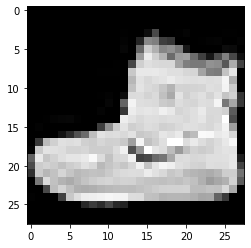

In [45]:
plt.imshow(image.squeeze(), cmap='gray')
print('label:', label)

In [46]:
batch = next(iter(train_loader))
images, labels = batch
images.shape, labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

labels: tensor([0, 8, 5, 6, 5, 4, 0, 5, 5, 3, 7, 1, 8, 3, 5, 3, 0, 6, 1, 0, 7, 9, 0, 5, 1, 4, 2, 4, 6, 4, 2, 9])


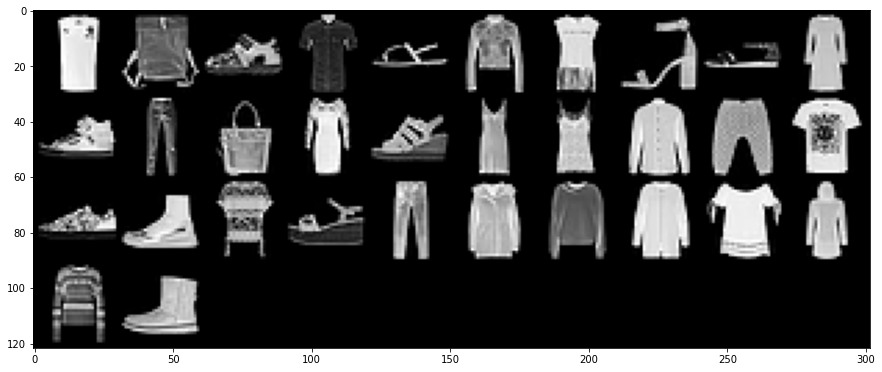

In [47]:
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15, 15))
plt.imshow(np.transpose(grid, (1, 2, 0)))
print('labels:', labels)

### Creating Custom Dataset

In [48]:
from torch.utils.data import Dataset

class MyDataset(Dataset):
  def __init__(self):
    self.data = (
        "This was an amazing product", 
        "This was the shitiest product possible", 
        "Amazing product, fast delivery", 
        "Had to sell my kidney to buy this, and my life has changed", 
        "Good one!", 
        "Bad one!"
    )
  
  def __getitem__(self, index):
    return self.data[index]

  def __len__(self):
    return len(self.data)

myData = MyDataset()

In [49]:
for m in myData:
  print(m)

This was an amazing product
This was the shitiest product possible
Amazing product, fast delivery
Had to sell my kidney to buy this, and my life has changed
Good one!
Bad one!


In [50]:
train_loader = torch.utils.data.DataLoader(myData, batch_size=2, shuffle=True)
for tr in train_loader:
  print(tr)

['Bad one!', 'Good one!']
['This was the shitiest product possible', 'Amazing product, fast delivery']
['Had to sell my kidney to buy this, and my life has changed', 'This was an amazing product']


## Network

In [51]:
import torch.nn as nn

class Network(nn.Module):
  def __init__(self):
    super().__init__()
    # input size = 28
    # output size = 24
    # receptive field = 5
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    # input size = 24
    # output size = 20
    # receptive field = 9
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    # input 12X20X20, output = 
    self.fc1 = nn.Linear(in_features=12*20*20, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)

  def forward(self, t):
    return t



In [52]:
network = Network()
print(network)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=4800, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


In [53]:
network.fc2

Linear(in_features=120, out_features=60, bias=True)

In [54]:
dir(network.fc2)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__constants__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_backward_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_state_dict_hooks',
 '_version',
 'add_m

In [55]:
network.fc2.weight

Parameter containing:
tensor([[ 0.0508, -0.0833,  0.0763,  ...,  0.0327,  0.0520, -0.0464],
        [ 0.0567,  0.0683, -0.0331,  ...,  0.0238,  0.0701,  0.0572],
        [ 0.0464,  0.0715,  0.0471,  ..., -0.0853,  0.0006, -0.0074],
        ...,
        [ 0.0809, -0.0570,  0.0365,  ...,  0.0626, -0.0151,  0.0067],
        [ 0.0770,  0.0510,  0.0318,  ...,  0.0149, -0.0187, -0.0414],
        [ 0.0345, -0.0642,  0.0172,  ...,  0.0467,  0.0211, -0.0453]], requires_grad=True)

### A Better Network

In [62]:
import torch.nn.functional as F
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)

  def forward(self, t):
    # input layer
    x = t
    # conv1 layer
    x = self.conv1(x) # Input size = 28, output size = 24
    x = F.relu(x)
    x = F.max_pool2d(x, kernel_size=2, stride=2) # Input size = 24, output size = 12

    # conv2 layer
    x = self.conv2(x) # Input size = 12, output size = 8
    x = F.relu(x)
    x = F.max_pool2d(x, kernel_size=2, stride=2) # Input size = 8, output size = 4

    # reshape
    x = x.reshape(-1, 12*4*4)
    # fc1 layer
    x = self.fc1(x)
    x = F.relu(x)

    # fc2 layer
    x = self.fc2(x)
    x = F.relu(x)

    # output layer
    x = self.out(x)

    return x


In [57]:
torch.set_grad_enabled(False)

In [59]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data', 
    train=True, 
    download=True, 
    transform=transforms.Compose([
                                  transforms.ToTensor()
    ])
)

In [60]:
sample = next(iter(train_set))
image, label = sample
image.shape, image.unsqueeze(0).shape

(torch.Size([1, 28, 28]), torch.Size([1, 1, 28, 28]))

In [63]:
network = Network()
pred = network(image.unsqueeze(0))

In [64]:
pred, pred.shape, label

(tensor([[-0.1059,  0.0133,  0.0782,  0.0257, -0.0245, -0.0194, -0.0686,  0.0214, -0.0885, -0.0796]]),
 torch.Size([1, 10]),
 9)

In [65]:
pred.argmax(dim=1)

tensor([2])

In [71]:
F.softmax(pred, dim=1)

tensor([[0.0921, 0.1037, 0.1107, 0.1050, 0.0999, 0.1004, 0.0956, 0.1046, 0.0937, 0.0945]])

In [72]:
data_loader = torch.utils.data.DataLoader(
    train_set, 
    batch_size=10
)

In [73]:
batch = next(iter(data_loader))

In [74]:
images, labels = batch
preds = network(images)

In [75]:
preds

tensor([[-0.1059,  0.0133,  0.0782,  0.0257, -0.0245, -0.0194, -0.0686,  0.0214, -0.0885, -0.0796],
        [-0.1044,  0.0124,  0.0762,  0.0254, -0.0240, -0.0191, -0.0689,  0.0190, -0.0910, -0.0784],
        [-0.1040,  0.0118,  0.0784,  0.0200, -0.0238, -0.0189, -0.0670,  0.0196, -0.0891, -0.0777],
        [-0.1028,  0.0118,  0.0765,  0.0216, -0.0238, -0.0201, -0.0685,  0.0195, -0.0886, -0.0782],
        [-0.1034,  0.0141,  0.0801,  0.0212, -0.0229, -0.0248, -0.0700,  0.0176, -0.0866, -0.0771],
        [-0.1044,  0.0098,  0.0728,  0.0270, -0.0239, -0.0182, -0.0697,  0.0195, -0.0886, -0.0791],
        [-0.1067,  0.0132,  0.0739,  0.0318, -0.0225, -0.0221, -0.0705,  0.0228, -0.0830, -0.0783],
        [-0.1073,  0.0098,  0.0745,  0.0246, -0.0260, -0.0185, -0.0715,  0.0184, -0.0911, -0.0782],
        [-0.1033,  0.0105,  0.0807,  0.0191, -0.0205, -0.0246, -0.0657,  0.0139, -0.0876, -0.0817],
        [-0.1040,  0.0121,  0.0803,  0.0256, -0.0189, -0.0252, -0.0693,  0.0128, -0.0852, -0.0845]])

In [76]:
preds.argmax(dim=1)

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [77]:
preds.argmax(dim=1).eq(labels)

tensor([False, False, False, False, False,  True, False,  True, False, False])

In [79]:
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [80]:
get_num_correct(preds, labels)

2

## Training

In [81]:
import torch.optim as optim

torch.set_grad_enabled(True)

In [83]:
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item()

2.303788423538208

In [84]:
print(network.conv1.weight.grad)

None


### First step training

In [85]:
loss.backward()

In [86]:
print(network.conv1.weight.grad)

tensor([[[[-8.9579e-04, -2.0465e-03, -7.4764e-04,  1.1690e-04, -6.7645e-04],
          [-1.3878e-03, -1.9863e-03, -6.8764e-04,  1.4241e-04, -2.0376e-05],
          [-2.2922e-03, -3.1155e-03, -1.8064e-03, -1.1380e-03,  4.3118e-04],
          [-1.9609e-03, -2.9093e-03, -2.2587e-03, -8.3695e-04, -6.2818e-04],
          [-2.8425e-03, -2.7461e-03, -9.7285e-04, -3.1112e-04, -2.3745e-04]]],


        [[[ 1.0524e-04, -5.0927e-04, -6.1936e-05, -1.0101e-04, -1.3657e-04],
          [ 7.7265e-04, -4.0023e-04, -4.4673e-05, -3.2379e-04, -2.3409e-04],
          [ 8.7053e-04,  1.2188e-04,  3.6494e-04, -1.4682e-04,  1.6138e-04],
          [ 1.0505e-03,  6.2486e-04,  6.8461e-04,  5.0211e-04,  3.5363e-04],
          [ 5.8062e-04,  5.7053e-04,  5.8137e-04, -5.0469e-05,  2.7774e-04]]],


        [[[-3.9265e-04, -3.9651e-04, -3.0459e-03, -2.3171e-03, -1.9341e-03],
          [ 1.5363e-03, -1.7633e-03, -3.8548e-03, -2.0252e-03, -1.7389e-03],
          [ 8.7203e-05, -1.4285e-03, -2.7996e-03, -8.5437e-04, -9.33

In [87]:
print(network.conv1.weight.grad.shape)

torch.Size([6, 1, 5, 5])


In [88]:
optimizer = optim.Adam(network.parameters(), lr = 0.01)

In [89]:
loss.item(), get_num_correct(preds, labels)

(2.303788423538208, 2)

In [90]:
optimizer.step() # Update weights

In [91]:
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(2.2410874366760254, 2)

### Second Step Training

In [92]:
loss.backward()
optimizer.zero_grad()
optimizer.step()
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(2.1716456413269043, 3)

### Third Step Training

In [93]:
loss.backward()
optimizer.zero_grad()
optimizer.step()
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(2.0825531482696533, 1)

### Fourth Step Training

In [94]:
loss.backward()
optimizer.zero_grad()
optimizer.step()
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(1.9852142333984375, 4)